In [21]:
'''
Imports
'''
proj_dir = '/Users/prabh/200 RESEARCH/Cluster Expansion Project'

# gives the notebook access to the cluster_expansion personal library
from sys import path
path.append(proj_dir)
import cluster_expansion as ce
from cluster_expansion import os, pd, np, plt, sns, tf, Markdown, display, train_test_split

In [22]:
seqs = '100M'
tensor_dir = f'../InteractionTensors/{seqs} Sequences/Symmetric'
consolidated = False

if consolidated:
  W = np.zeros((200))
  J = np.load(f'{tensor_dir}/JC_{seqs}.npy')
  G = np.load(f'{tensor_dir}/GC_{seqs}.npy')
else:
  W = np.load(f'{tensor_dir}/W_{seqs}.npy')
  J = np.load(f'{tensor_dir}/J_{seqs}.npy')
  G = np.load(f'{tensor_dir}/G_{seqs}.npy')

In [47]:
# read the random library in
data_lib = 'Tiling'
df = pd.read_csv(f"{proj_dir}/Data/{data_lib}/{data_lib}_S_C0freeAvg.dat", sep = "\t")

# extract sequence and c0 values from the tiling library
seqArray = df['Sequence'].values
c0Array = df['C0free'].values

# convert the sequences to onehot
onehotArray = ce.Data2Onehot(seqArray)

Encoded all sequences to onehot


In [48]:
mu = onehotArray.mean(axis = 0)
display(pd.DataFrame(mu))

,0
0,0.309715
1,0.302845
2,0.195132
3,0.192308
4,0.307001
...,...
195,0.193384
196,0.309568
197,0.302062
198,0.195242


In [42]:
JC = ce.Consolidate(W, J)

saveJC = False
if saveJC:
  np.save(f'../InteractionTensors/{seqs} Sequences/Symmetric/JC_{seqs}.npy', JC)

In [43]:
GC = ce.Consolidate(W, J, G)

saveGC = False
if saveGC:
  np.save(f'../InteractionTensors/{seqs} Sequences/Symmetric/GC_{seqs}.npy', GC)

Pearson correlation: 0.924, [-0.003, 0.003]
Pearson correlation: 0.924, [-0.003, 0.003]


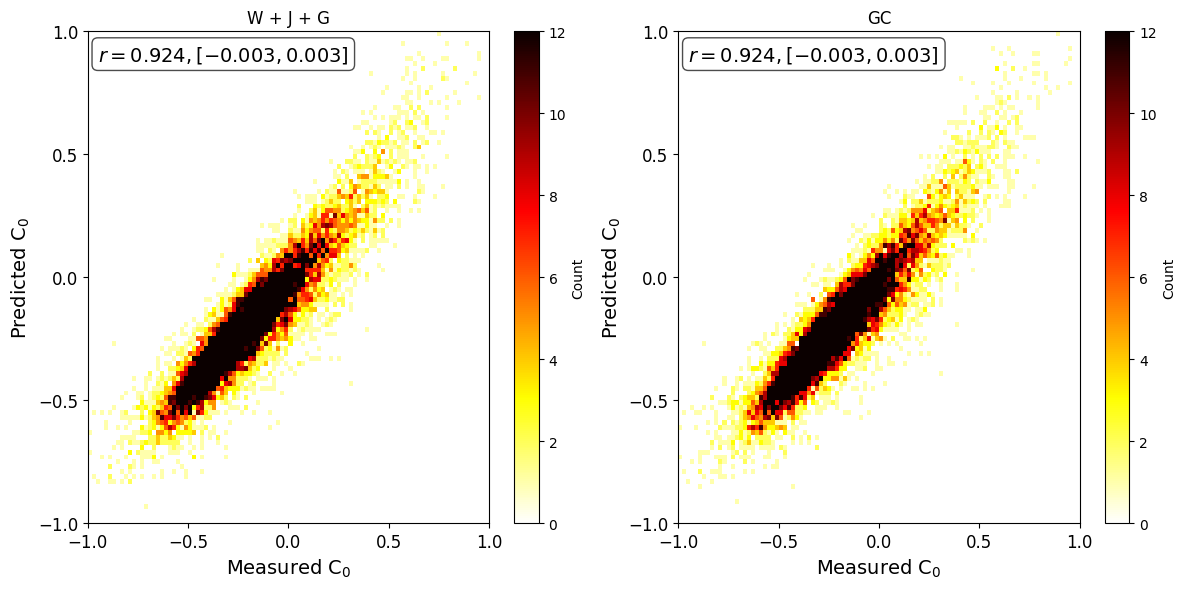

In [44]:
# The code in the previous cell is an example of using the plot_hist2d function in a subplot setting
# compare before vs after consolidation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.ravel()

_orig_fig, _orig_show = plt.figure, plt.show
plt.figure = lambda *a, **k: plt.gcf()
plt.show = lambda *a, **k: None

cases = [
  ce.c0Test(onehotArray, c0Array, avgFreq = mu, avgC0 = np.mean(c0Array), W=W, J=J, G=G),
  ce.c0Test(onehotArray, c0Array, avgFreq = mu, avgC0 = np.mean(c0Array), G=GC)
]
titles = ["W + J + G", "GC"]

try:
  for ax, (pred_arr, r_val, rErr_val, prec_val), title in zip(axes, cases, titles):
    plt.sca(ax)
    ce.plot_hist2d(c0Array, pred_arr, r_val, rErr_val, vmin=0, vmax=12, fig_dim=6, n_bins=100, precision=prec_val)
    ax.set_title(title)
finally:
  plt.figure, plt.show = _orig_fig, _orig_show

plt.tight_layout()
plt.show()

Pearson correlation: 0.757, [-0.008, 0.007]
Pearson correlation: 0.758, [-0.008, 0.007]


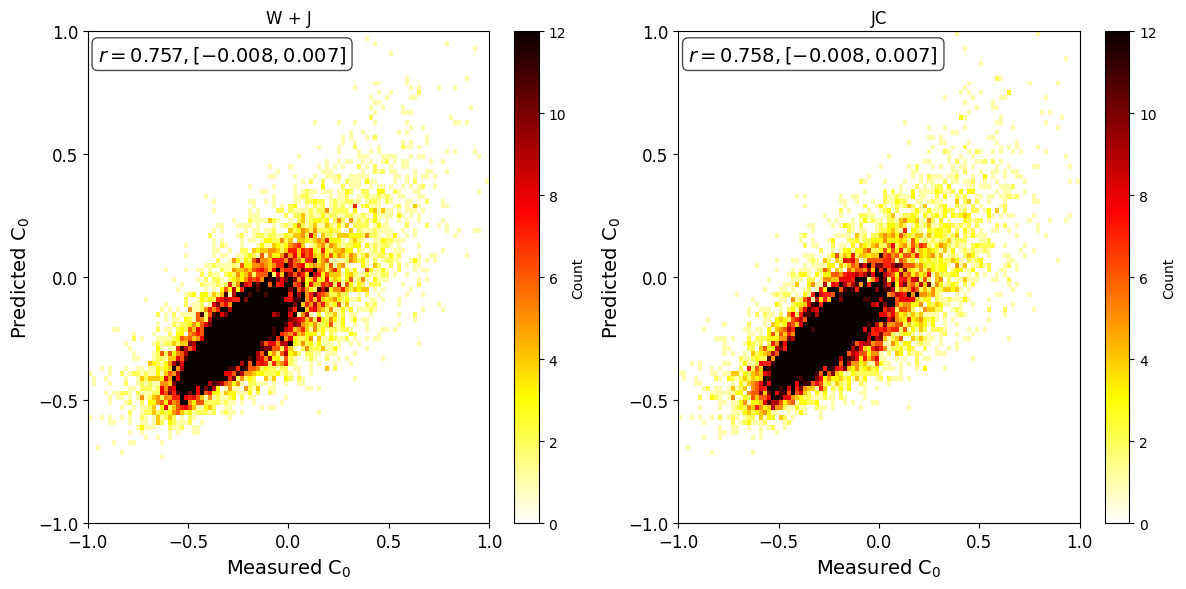

In [45]:
# The code in the previous cell is an example of using the plot_hist2d function in a subplot setting
# compare before vs after consolidation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.ravel()

_orig_fig, _orig_show = plt.figure, plt.show
plt.figure = lambda *a, **k: plt.gcf()
plt.show = lambda *a, **k: None

cases = [
  ce.c0Test(onehotArray, c0Array, avgFreq = mu, avgC0 = np.mean(c0Array), W=W, J=J),
  ce.c0Test(onehotArray, c0Array, avgFreq = mu, avgC0 = np.mean(c0Array), J=JC)
]
titles = ["W + J", "JC"]

try:
  for ax, (pred_arr, r_val, rErr_val, prec_val), title in zip(axes, cases, titles):
    plt.sca(ax)
    ce.plot_hist2d(c0Array, pred_arr, r_val, rErr_val, vmin=0, vmax=12, fig_dim=6, n_bins=100, precision=prec_val)
    ax.set_title(title)
finally:
  plt.figure, plt.show = _orig_fig, _orig_show

plt.tight_layout()
plt.show()

#### `Symmetric Model Correlations` (Random Library)

##### `0.1M Sequences`

W+J   : 0.688 [-0.009, 0.009] <br>
W+J+G : 0.34  [-0.02, 0.02] <br>

##### `1M Sequences`

W+J   : 0.749 [-0.008, 0.008] <br>
W+J+G : 0.719 [-0.009, 0.008] <br>

##### `10M Sequences`

W+J   : 0.756 [-0.008, 0.007] <br>
W+J+G : 0.899 [-0.003, 0.003] <br>

##### `100M Sequences`

W+J.  : 0.757 [-0.007, 0.007] <br>
W+J+G : 0.924 [-0.003, 0.003] <br>